🦜 Uncomment the following code for the [TidyTuesday Bird Bath dataset](https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-08-31).🦉

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
df_birdbath = read_csv(
    'https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-08-31/bird_baths.csv?raw=true',
    col_types = cols()
)

In [4]:
df_birdbath %>% head

survey_year,urban_rural,bioregions,bird_type,bird_count
<dbl>,<chr>,<chr>,<chr>,<dbl>
2014,Urban,South Eastern Queensland,Bassian Thrush,0
2014,Urban,South Eastern Queensland,Chestnut-breasted Mannikin,0
2014,Urban,South Eastern Queensland,Wild Duck,0
2014,Urban,South Eastern Queensland,Willie Wagtail,0
2014,Urban,South Eastern Queensland,Regent Bowerbird,0
2014,Urban,South Eastern Queensland,Rufous Fantail,0


Each row represents the number of times a type of bird was observed at a bird bath in the survey year.

We want to just work with the most numerous birds for baths that have been categorized as "Urban" or "Rural."

Find the top fifteen bird types by total `bird_count` after filtering out baths where `urban_rural` category is not provided. Capture this vector with a variable called `top15_bird_types`. 

Hint: remember `pull` and `slice_max` 

In [13]:
top15_bird_types = 
df_birdbath %>%
    na.omit(urban_rural) %>%
#             group_by(bird_type) %>%
            slice_max(n.distinct(bird_type), n = 15) %>%
                pull(bird_type)

top15_bird_types

[1] "Bassian Thrush"

In [15]:
df_birdtype %>% pull(bird_type) %>% n_distinct()

[1] 169

In [21]:
df_birdbath %>%
    filter(!is.na(urban_rural)) %>%
        group_by(bird_type) %>%
            summarize(total_bird_count  = sum(bird_count) %>%
                        slice_max(total_bird_count, n = 15) %>%
                              pull(bird_type)

ERROR: Error in parse(text = x, srcfile = src): <text>:7:0: unexpected end of input
5:                         slice_max(total_bird_count, n = 15) %>%
6:                               pull(bird_type)
  ^


In [22]:
top15_bird_types = df_birdbath %>%
    filter(!is.na(urban_rural)) %>%
    group_by(bird_type) %>%
    summarize(total_bird_count = sum(bird_count)) %>%
    slice_max(total_bird_count, n = 15) %>%
    pull(bird_type)

1. Create a table of just the top birds using the vector above to filter. Exclude rows with `NA` vlues for `urban_rural`.
1. Group by `bird_type` and `urban_rural` and find the mean `bird_count` for each group.
1. Sort the factor levels for `bird_type` by `mean_bird_count` value at `Rural` baths.
1. Capture the output of these operations under a new variable.

Your final table will have three columns: 1) `bird-type`, 2) `urban_rural` and 3) `mean_bird_count`

In [40]:
#fct_inorder .. arrange

bird_top_15 = 
    df_birdbath %>%
        filter(!is.na(urban_rural)) %>%
            filter(bird_type %in% top15_bird_types) #Try to collapse filters later

In [56]:
df_mean_bird_count = 

bird_top_15 %>%
        group_by(bird_type, urban_rural) %>%
            summarize(mean_bird_count = mean(bird_count), .groups = 'drop') %>%
                                        arrange(urban_rural, mean_bird_count) %>%
                                                mutate(bird_type = fct_inorder(bird_type))
                                            
# .groups = 'drop' if you remove that part you get an error and he explained it but I need to clarify
                    
                    
# df_sorted = df %>%
#     group_by(country) %>%
#     mutate(n = n()) %>%
#     ungroup() %>% # Why do we need to ungroup?
#     arrange(n) %>%
#     mutate(country_sorted = fct_inorder(country))
           
# p = ggplot(df_sorted, aes(x = country_sorted))

# p = p + geom_bar() + coord_flip()

# p

Make a "Urban"/"Rural" [Cleveland dot chart](https://uc-r.github.io/public/images/visual/cleveland-dotplots/unnamed-chunk-10-1.png) following figure with your new table. 

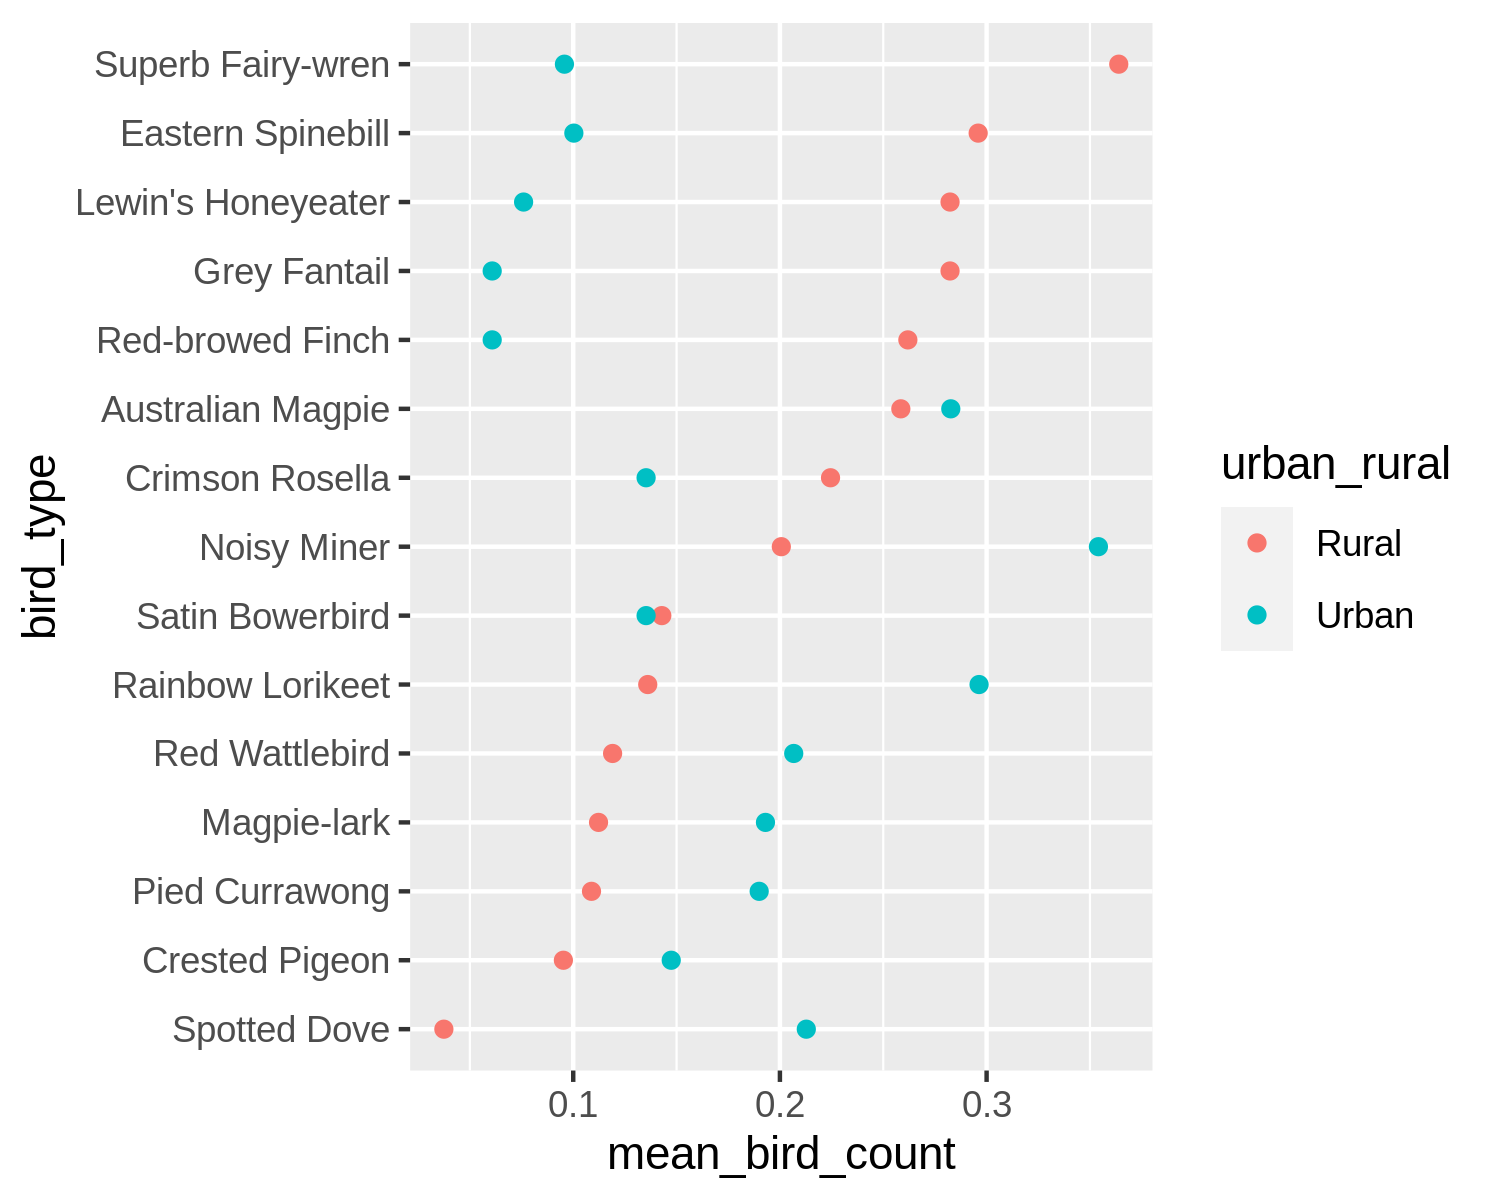

In [57]:
p = ggplot(df_mean_bird_count, aes(x = mean_bird_count, y = bird_type, color = urban_rural))

p = p + geom_point()

# p = p + geom_segment(mpg_wider_ID, mapping = aes(x = cty, xend = hwy, y = id, yend = id))

p



If we want to add "segments" to our dot chart, we need to re-shape our data into "wide" format. Specifically we want to have "Urban" and "Rural" as **columns** instead of **values**.

Use `pivot_wider` to make this wide table, capture it, and use `geom_segment` in combination with your wide table to add segments to your Cleveland dot chart from above 👆.

(Uncomment the code and make the cell below markdown to see my solution.)

![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_01_pivot_chart.png?raw=true)